In [1]:
using CSV, DataFrames, Gadfly, GLM, Distributions

In [2]:
data = CSV.read("bloodpressure.csv")
head(data)

,Pt,BP,Age,Weight,BSA,Dur,Pulse,Stress
1,1,105,47,85.4,1.75,5.1,63,33
2,2,115,49,94.2,2.1,3.8,70,14
3,3,116,49,95.3,1.98,8.2,72,10
4,4,117,50,94.7,2.01,5.8,73,99
5,5,112,51,89.4,1.89,7.0,72,95
6,6,121,48,99.5,2.25,9.3,71,10


In [3]:
Y = collect(skipmissing(data[:,:BP]))
X₁ = collect(skipmissing(data[:,:Age]))
X₂ = collect(skipmissing(data[:,:Weight]))
X₃ = collect(skipmissing(data[:,:BSA]))
X₄ = collect(skipmissing(data[:,:Dur]))
X₅ = collect(skipmissing(data[:,:Pulse]))
X₆ = collect(skipmissing(data[:,:Stress]))
n = length(Y)

X = hcat(ones(n),X₁,X₂,X₃,X₄,X₅,X₆)
p = size(X,2)-1


# a = std(Y)
# b = mean(Y)
# Y = (Y-b)/a

# X = hcat(X₁,X₂,X₃,X₄,X₅,X₆)
# a = std(X,1)
# b = mean(X,1)
# X = (X.-b)./a
# X = hcat(ones(n),X);
# p = size(X,2)-1

In [21]:
# Calculer le VIF
VIF = Float64[] 

for i=1:p

    ind = trues(p+1)
    ind[i+1] = false
    XX = X[:,ind]
    YY = X[:,.!(ind)]

    β̂ = (XX'XX)\XX'YY
    e = YY-XX*β̂
    SSE = sum(e.^2)
    SST = sum((YY-mean(YY)).^2)

    R² = 1-SSE/SST

    push!(VIF,1/(1-R²))
    
end

VIF

6-element Array{Float64,1}:
 1.76281
 8.41704
 5.32875
 1.23731
 4.41358
 1.83485

In [22]:
F = eigfact(X'X)
λ = F[:values]
ϕ = sqrt.(maximum(λ)./λ)

7-element Array{Float64,1}:
 4016.58   
 2149.25   
   85.673  
   72.8589 
   62.6133 
    4.23423
    1.0    

In [82]:
NITER = 10000

β = zeros(p+1,NITER)
σ² = ones(NITER)
τ² = ones(NITER)

for iter=2:NITER
   
    μ = (σ²[iter-1]/τ²[iter-1]*eye(p+1) + X'X)\X'Y
    
    J = σ²[iter-1]/τ²[iter-1]*eye(p+1) + X'X
    h = J*μ
    
    β[:,iter] = rand(MvNormalCanon(h, J))
    
    σ²[iter] = rand(InverseGamma(n/2,(Y-X*β[:,iter])'*(Y-X*β[:,iter])/2 ))
    
    τ²[iter] = rand(InverseGamma((p+1)/2,β[:,iter]'*β[:,iter]/2 ))
    
end

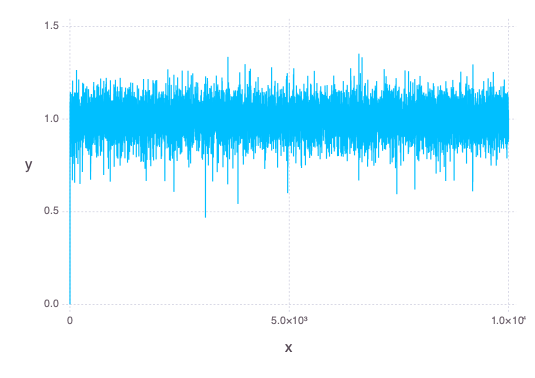

In [83]:
plot(x=1:NITER,y=β[3,:], Geom.line)


In [84]:
β̂ = mean(β,2)

7×1 Array{Float64,2}:
 -0.757115  
  0.591339  
  0.996303  
  0.668499  
  0.109712  
 -0.132982  
  0.00935704

In [85]:
β̂ = (X'X)\X'Y

7-element Array{Float64,1}:
 -12.8705   
   0.703259 
   0.96992  
   3.77649  
   0.068383 
  -0.0844847
   0.0055715